In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report



In [2]:
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

1224
216
Model accuracy: 0.6851851851851852


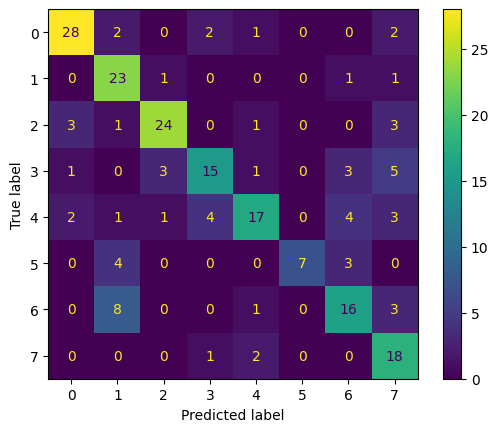

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

data = pd.read_csv('audio_features.csv')  

X = data.iloc[:, :-1]  
y = data.iloc[:, -1] 
# print(len(X))
# print(len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(len(X_train))
print(len(y_test))
rf_model = RandomForestClassifier(n_estimators=2000, random_state=42)  
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm)  
disp.plot()
print("Model accuracy:", accuracy_rf)
plt.show()


In [8]:
far_per_class = []
for i in range(cm.shape[0]):
    TN = cm[i, i]
    FP = np.sum(cm[i, :]) - TN
    far_per_class.append(FP / float(TN + FP))

print("False Alarm Rates (FAR) for each class:")
for i, far in enumerate(far_per_class):
    print(f"Class {i+1}: {far}")


avg_far = np.mean(far_per_class)

print("Average FAR:", avg_far)

False Alarm Rates (FAR) for each class:
Class 1: 0.2
Class 2: 0.11538461538461539
Class 3: 0.25
Class 4: 0.4642857142857143
Class 5: 0.46875
Class 6: 0.5
Class 7: 0.42857142857142855
Class 8: 0.14285714285714285
Average FAR: 0.3212311126373626


In [4]:
classification_report(y_pred=y_pred, y_true=y_test, target_names=emotion_map.values(), output_dict=True)

{'neutral': {'precision': 0.7755102040816326,
  'recall': 0.6909090909090909,
  'f1-score': 0.7307692307692307,
  'support': 55.0},
 'calm': {'precision': 0.5362318840579711,
  'recall': 0.8604651162790697,
  'f1-score': 0.6607142857142857,
  'support': 43.0},
 'happy': {'precision': 0.7073170731707317,
  'recall': 0.5178571428571429,
  'f1-score': 0.5979381443298969,
  'support': 56.0},
 'sad': {'precision': 0.6595744680851063,
  'recall': 0.6595744680851063,
  'f1-score': 0.6595744680851063,
  'support': 47.0},
 'angry': {'precision': 0.5869565217391305,
  'recall': 0.5192307692307693,
  'f1-score': 0.5510204081632653,
  'support': 52.0},
 'fearful': {'precision': 0.75,
  'recall': 0.42857142857142855,
  'f1-score': 0.5454545454545454,
  'support': 21.0},
 'disgust': {'precision': 0.46511627906976744,
  'recall': 0.4444444444444444,
  'f1-score': 0.45454545454545453,
  'support': 45.0},
 'surprised': {'precision': 0.5849056603773585,
  'recall': 0.7560975609756098,
  'f1-score': 0.65

In [103]:
TN = cm[0][0]  
FP = cm[0][1]  

FAR = FP / float(TN + FP)

print("False Alarm Rate (FAR):", FAR) 

False Alarm Rate (FAR): 0.06666666666666667


In [98]:
import pickle
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Load model using pickle
with open('rf_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [2]:
rf_model.predict([[0.32919294, 0.34177747, 2316.926723, 1820.90604, 1931.406945, 1178.453863, 4394.620961, 3365.274174, 0.210836377, 0.223367905, -611.3766, 45.335247, -4.4751716, 1.8758893, -4.2295012, -4.015012, -4.042882, -7.677704, -10.80253, -2.930702, -3.4347343, -6.7044926, -4.0754805, 1.4676341, -8.438529, -2.8350508, -3.5769722, -1.5365398, -5.0917897, -1.2220018, 184.58734, 62.467598, 23.13313, 21.60998, 16.657581, 14.949239, 14.606617, 13.234856, 13.234605, 10.4578705, 8.120399, 9.222302, 7.731724, 6.474648, 9.349535, 7.2997828, 6.5417128, 4.509635, 5.730127, 5.642042]])
# filename = 'finalized_model.sav'
# pickle.dump(rf_model, open(filename, 'wb'))

/workspace/voiceemotion/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['disgust'], dtype=object)

In [9]:
from joblib import dump, load
dump(rf_model, 'model.joblib') 

['model.joblib']

In [ ]:
loaded_model = load(f'model.joblib')

In [13]:
import pyaudio

pa = pyaudio.PyAudio()

print('\navailable devices:')

for i in range(pa.get_device_count()):
    dev = pa.get_device_info_by_index(i)
    name = dev['name'].encode('utf-8')
    print(i, name, dev['maxInputChannels'], dev['maxOutputChannels'])

print('\ndefault input & output device:')
print(pa.get_default_input_device_info())
print(pa.get_default_output_device_info())


available devices:

default input & output device:


OSError: No Default Input Device Available

In [3]:
import pyaudio
import numpy as np
import librosa
def extract_features(y, sr):
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    return {
        'chroma_stft_mean': np.mean(chroma_stft),
        'chroma_stft_std': np.std(chroma_stft),
        'spectral_centroid_mean': np.mean(spectral_centroid),
        'spectral_centroid_std': np.std(spectral_centroid),
        'spectral_bandwidth_mean': np.mean(spectral_bandwidth),
        'spectral_bandwidth_std': np.std(spectral_bandwidth),
        'rolloff_mean': np.mean(rolloff),
        'rolloff_std': np.std(rolloff),
        'zero_crossing_rate_mean': np.mean(zero_crossing_rate),
        'zero_crossing_rate_std': np.std(zero_crossing_rate),
        **{f'mfcc{i}_mean': np.mean(mfcc[i]) for i in range(mfcc.shape[0])},
        **{f'mfcc{i}_std': np.std(mfcc[i]) for i in range(mfcc.shape[0])}
    }

In [11]:
CHUNK_SIZE = 1024  
FORMAT = pyaudio.paInt16
CHANNELS = 1  
RATE = 48000  

p = pyaudio.PyAudio()   
stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE,
                input=True, frames_per_buffer=CHUNK_SIZE,)

buffer = []  
BUFFER_LENGTH = 4  

try:
    while True:
        data = stream.read(CHUNK_SIZE)
        buffer.append(data)

        if len(buffer) == BUFFER_LENGTH:
            frames = b''.join(buffer) 
            y = np.frombuffer(frames, dtype=np.int16) 

            features = extract_features(y, RATE) 
            df = pd.DataFrame(features, index=[0])

            prediction = rf_model.predict(df)[0]
            print("Predicted emotion:", prediction)

            buffer = []  

except KeyboardInterrupt:
    print("Exiting...")
    stream.stop_stream()
    stream.close()
    p.terminate()

OSError: [Errno -9996] Invalid input device (no default output device)

In [31]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.65625


In [3]:
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)

print("Model accuracy:", accuracy_svm)

KeyboardInterrupt: 

In [ ]:
svm_model.predict([[0.37641326, 0.34533763, 2812.623531, 1699.600713, 2223.518311, 1097.167833, 5244.614907, 3141.146979, 0.254186243, 0.224712816, -556.4647, 26.454716, -14.584365, 0.005433196, -8.514774, -6.439196, -5.73373, -16.837593, -10.86787, -2.7984526, -6.635927, -7.3337173, -5.5277143, 1.3519403, -5.674757, -2.2004018, -2.3454711, -1.8504477, 1.3360987, 6.035913, 167.3887, 45.053513, 27.54701, 19.693098, 13.664069, 14.710418, 11.239458, 18.139906, 13.660529, 9.4447, 10.717027, 10.554236, 10.158782, 5.6464195, 9.206933, 8.910845, 7.8282475, 10.032634, 11.2360525, 13.15726]])


/workspace/voiceemotion/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['fearful'], dtype=object)

In [4]:
y.shape

(1440,)

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical 
import numpy as np



encoder = LabelEncoder()
y_train = encoder.fit_transform(y)
y_train = to_categorical(y_train)  
X_train = np.expand_dims(X, axis=2)
model=Sequential()

model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'Adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()



2024-03-18 19:08:10.575713: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 19:08:11.194246: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/workspace/voiceemotion/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-03-18 19:08:11.757283: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-18 19:08:11.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 50, 512)        │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 25, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 25, 1024)       │     2,622,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 13, 1024)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 13, 256)        │     1,310,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 7, 128)         │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 4, 64)          │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,145,896 (15.82 MB)

 Trainable params: 4,145,896 (15.82 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1 , validation_split=0.2) 

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.1354 - loss: 124.0031 - val_accuracy: 0.1285 - val_loss: 2.0781
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.1158 - loss: 2.0776 - val_accuracy: 0.1389 - val_loss: 2.0766
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.1078 - loss: 2.0757 - val_accuracy: 0.1285 - val_loss: 2.0752
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.1392 - loss: 2.0758 - val_accuracy: 0.1285 - val_loss: 2.0740
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - accuracy: 0.1438 - loss: 2.0740 - val_accuracy: 0.1285 - val_loss: 2.0728
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 0.1364 - loss: 2.0725 - val_accuracy: 0.1285 - val_loss: 2.0718
Epoch 7/20
 6/36 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.1280 - loss: 2.0699

KeyboardInterrupt: 

In [ ]:
history.history['accuracy'][-1]  

0.125

In [4]:
from pycaret.classification import * 
clf_setup = setup(data, target='label', session_id=123, fold=5)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Multiclass
3,Target mapping,"angry: 0, calm: 1, disgust: 2, fearful: 3, happy: 4, neutral: 5, sad: 6, surprised: 7"
4,Original data shape,"(1440, 51)"
5,Transformed data shape,"(1440, 51)"
6,Transformed train set shape,"(1007, 51)"
7,Transformed test set shape,"(433, 51)"
8,Numeric features,50
9,Preprocess,True


In [7]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:45:05
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6226,0.0000,0.6226,0.6322,0.6172,0.5659,0.5688,0.0480
rf,Random Forest Classifier,0.5809,0.0000,0.5809,0.5876,0.5714,0.5176,0.5210,0.0580
qda,Quadratic Discriminant Analysis,0.5770,0.0000,0.5770,0.5420,0.5546,0.5119,0.5148,0.0140
gbc,Gradient Boosting Classifier,0.5531,0.0000,0.5531,0.5516,0.5468,0.4861,0.4874,1.4400
lda,Linear Discriminant Analysis,0.5402,0.0000,0.5402,0.5420,0.5342,0.4715,0.4730,0.0100
ridge,Ridge Classifier,0.5352,0.0000,0.5352,0.5114,0.5118,0.4638,0.4673,0.0120
lr,Logistic Regression,0.4419,0.0000,0.4419,0.4341,0.4326,0.3582,0.3594,0.0800
dt,Decision Tree Classifier,0.3645,0.0000,0.3645,0.3620,0.3601,0.2697,0.2704,0.0180
nb,Naive Bayes,0.3327,0.0000,0.3327,0.3396,0.3210,0.2394,0.2429,0.0080
ada,Ada Boost Classifier,0.2631,0.0000,0.2631,0.2735,0.2464,0.1576,0.1615,0.0600


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [12]:
best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [5]:
data.columns

Index(['chroma_stft_mean', 'chroma_stft_std', 'spectral_centroid_mean',
       'spectral_centroid_std', 'spectral_bandwidth_mean',
       'spectral_bandwidth_std', 'rolloff_mean', 'rolloff_std',
       'zero_crossing_rate_mean', 'zero_crossing_rate_std', 'mfcc0_mean',
       'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean', 'mfcc4_mean', 'mfcc5_mean',
       'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean',
       'mfcc11_mean', 'mfcc12_mean', 'mfcc13_mean', 'mfcc14_mean',
       'mfcc15_mean', 'mfcc16_mean', 'mfcc17_mean', 'mfcc18_mean',
       'mfcc19_mean', 'mfcc0_std', 'mfcc1_std', 'mfcc2_std', 'mfcc3_std',
       'mfcc4_std', 'mfcc5_std', 'mfcc6_std', 'mfcc7_std', 'mfcc8_std',
       'mfcc9_std', 'mfcc10_std', 'mfcc11_std', 'mfcc12_std', 'mfcc13_std',
       'mfcc14_std', 'mfcc15_std', 'mfcc16_std', 'mfcc17_std', 'mfcc18_std',
       'mfcc19_std', 'label'],
      dtype='object')

In [6]:
et = create_model('et') 
tuned_et = tune_model(et, n_iter=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6436,0.0000,0.6436,0.6548,0.6400,0.5904,0.5928
1,0.6287,0.0000,0.6287,0.6348,0.6240,0.5733,0.5758
2,0.6368,0.0000,0.6368,0.6313,0.6268,0.5824,0.5846
3,0.5622,0.0000,0.5622,0.5780,0.5623,0.4960,0.4979
4,0.6418,0.0000,0.6418,0.6621,0.6329,0.5874,0.5927
Mean,0.6226,0.0000,0.6226,0.6322,0.6172,0.5659,0.5688
Std,0.0306,0.0000,0.0306,0.0295,0.0280,0.0354,0.0360


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5842,0.0000,0.5842,0.6218,0.5744,0.5211,0.5289
1,0.5149,0.0000,0.5149,0.5481,0.5026,0.4415,0.4499
2,0.5572,0.0000,0.5572,0.5641,0.5429,0.4896,0.4935
3,0.5124,0.0000,0.5124,0.5481,0.5071,0.4382,0.4449
4,0.5771,0.0000,0.5771,0.6117,0.5602,0.5125,0.5212
Mean,0.5492,0.0000,0.5492,0.5788,0.5374,0.4806,0.4877
Std,0.0303,0.0000,0.0303,0.0317,0.0285,0.0348,0.0350


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [9]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [2]:
import tensorflow_decision_forests as tfdf
import pandas as pd

2024-03-19 04:02:09.672275: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 04:02:10.339608: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
data = pd.read_csv('audio_features.csv')  # Replace 'your_data.csv' with your filename
train = data.iloc[:-200,:]
test = data.iloc[-200:,:]
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]  
print(len(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1440


In [12]:
# train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="label")
# test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(, label="label")

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train, label="label")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, label="label")

In [15]:
model = tfdf.keras.RandomForestModel()

Use /tmp/tmpkst6pvhz as temporary training directory


In [17]:
model.fit(train_ds)
model.summary()

Reading training dataset...
Training dataset read in 0:00:00.030257. Found 1240 examples.
Training model...
Model trained in 0:00:00.537259
Compiling model...


[INFO 24-03-19 04:10:17.8156 UTC kernel.cc:1233] Loading model from path /tmp/tmpkst6pvhz/model/ with prefix 4a9e366da9d6461c
[INFO 24-03-19 04:10:17.9438 UTC decision_forest.cc:734] Model loaded with 300 root(s), 100770 node(s), and 50 input feature(s).
[INFO 24-03-19 04:10:17.9438 UTC abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 24-03-19 04:10:17.9438 UTC kernel.cc:1061] Use fast generic engine


Model compiled.
Model: "random_forest_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (50):
	chroma_stft_mean
	chroma_stft_std
	mfcc0_mean
	mfcc0_std
	mfcc10_mean
	mfcc10_std
	mfcc11_mean
	mfcc11_std
	mfcc12_mean
	mfcc12_std
	mfcc13_mean
	mfcc13_std
	mfcc14_mean
	mfcc14_std
	mfcc15_mean
	mfcc15_std
	mfcc16_mean
	mfcc16_std
	mfcc17_mean
	mfcc17_std
	mfcc18_mean
	mfcc18_std
	mfcc19_mean
	mfcc19_std
	mfcc1_mean
	mfcc1_std
	mfcc2_mean
	mfcc2_std
	mfcc3_mean
	mfcc3_std
	mfcc4_mean
	mfcc4_std
	mfcc5_mean
	mfcc5_std
	mfcc6_mean
	mfcc6_std
	mfcc7_mean
	mfcc7_std
	mfcc8_mean
	mfcc8_std
	mfcc9_mean
	mfcc9_std
	rolloff_mean
	rolloff_std
	spectral_bandwidth_mean
	spectral_

In [14]:
model.evaluate(test_ds)

1/1 [==============================] - 0s 111ms/step - loss: 0.0000e+00


0.0